In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('Gas consumption by country.csv')
df.head(10)

,Entity,Code,Year,Gas Consumption - TWh
0,Africa,NaN,1965,9.543754
1,Africa,NaN,1966,10.669916
2,Africa,NaN,1967,10.545670
3,Africa,NaN,1968,10.688970
4,Africa,NaN,1969,12.492000
5,Africa,NaN,1970,15.520325
6,Africa,NaN,1971,18.405264
7,Africa,NaN,1972,24.670657
8,Africa,NaN,1973,39.551791
9,Africa,NaN,1974,44.518487


In [2]:
df['Entity'].unique()

array(['Africa', 'Algeria', 'Argentina', 'Asia Pacific', 'Australia',
       'Austria', 'Azerbaijan', 'Bangladesh', 'Belarus', 'Belgium',
       'Brazil', 'Bulgaria', 'CIS', 'Canada', 'Central America', 'Chile',
       'China', 'Colombia', 'Croatia', 'Cyprus', 'Czechia', 'Denmark',
       'Eastern Africa', 'Ecuador', 'Egypt', 'Estonia', 'Europe',
       'European Union', 'Finland', 'France', 'Germany', 'Greece',
       'Hong Kong', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran',
       'Iraq', 'Ireland', 'Israel', 'Italy', 'Japan', 'Kazakhstan',
       'Kuwait', 'Latvia', 'Lithuania', 'Luxembourg', 'Malaysia',
       'Mexico', 'Middle Africa', 'Middle East', 'Morocco', 'Netherlands',
       'New Zealand', 'Non-OECD', 'North America', 'North Macedonia',
       'Norway', 'OECD', 'Oman', 'Pakistan', 'Peru', 'Philippines',
       'Poland', 'Portugal', 'Qatar', 'Romania', 'Russia', 'Saudi Arabia',
       'Singapore', 'Slovakia', 'Slovenia', 'South & Central America',
       'South Afric

## Visualising the trend of gas consumption by individual country/region

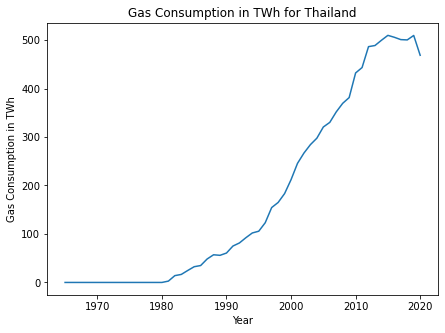

In [3]:
country_name = 'Thailand'
country = df.loc[df['Entity'] == country_name]

plt.figure(figsize = (7, 5))

plt.plot(country['Year'], country['Gas Consumption - TWh'])

plt.title('Gas Consumption in TWh for {0}'.format(country_name))
plt.xlabel('Year')
plt.ylabel('Gas Consumption in TWh')

plt.show()

## Splitting Data Frame into 2 Data Frames: 1 for regions, and 1 for individual countries

In [4]:
df

,Entity,Code,Year,Gas Consumption - TWh
0,Africa,NaN,1965,9.543754
1,Africa,NaN,1966,10.669916
2,Africa,NaN,1967,10.545670
3,Africa,NaN,1968,10.688970
4,Africa,NaN,1969,12.492000
...,...,...,...,...
4998,World,OWID_WRL,2016,35586.370667
4999,World,OWID_WRL,2017,36536.593944
5000,World,OWID_WRL,2018,38378.961722
5001,World,OWID_WRL,2019,39039.402361


### Sort by region

In [5]:
non_countries = ['Africa', 'Asia Pacific', 'CIS', 'Central America', 'Europe', 'European Union', 'Middle Africa',
                 'Middle East', 'Non-OECD', 'North America', 'OECD', 'South & Central America', 'Western Africa',
                 'World']

In [6]:
df_region = df[df['Entity'].isin(non_countries)]
df_region

,Entity,Code,Year,Gas Consumption - TWh
0,Africa,NaN,1965,9.543754
1,Africa,NaN,1966,10.669916
2,Africa,NaN,1967,10.545670
3,Africa,NaN,1968,10.688970
4,Africa,NaN,1969,12.492000
...,...,...,...,...
4998,World,OWID_WRL,2016,35586.370667
4999,World,OWID_WRL,2017,36536.593944
5000,World,OWID_WRL,2018,38378.961722
5001,World,OWID_WRL,2019,39039.402361


### Sort by country

In [7]:
df_country = df[~df['Entity'].isin(non_countries)]
df_country

,Entity,Code,Year,Gas Consumption - TWh
56,Algeria,DZA,1965,7.430500
57,Algeria,DZA,1966,7.719250
58,Algeria,DZA,1967,7.488250
59,Algeria,DZA,1968,7.873250
60,Algeria,DZA,1969,10.351688
...,...,...,...,...
4886,Vietnam,VNM,2016,102.386500
4887,Vietnam,VNM,2017,95.206900
4888,Vietnam,VNM,2018,96.596500
4889,Vietnam,VNM,2019,98.526500


## Top 10 Individual Countries by Mean Gas Consumption

In [8]:
allgcc = df_country.groupby(['Entity'])['Gas Consumption - TWh'].mean()
top10gcc = allgcc.nlargest(10)
tgcc = top10gcc.sort_values()
tgcc

Entity
Italy              464.780851
Japan              568.488532
China              577.523051
United Kingdom     615.911777
Iran               619.114174
Germany            640.389858
Ukraine            680.138011
Canada             702.661248
Russia            3582.853886
United States     5866.812360
Name: Gas Consumption - TWh, dtype: float64

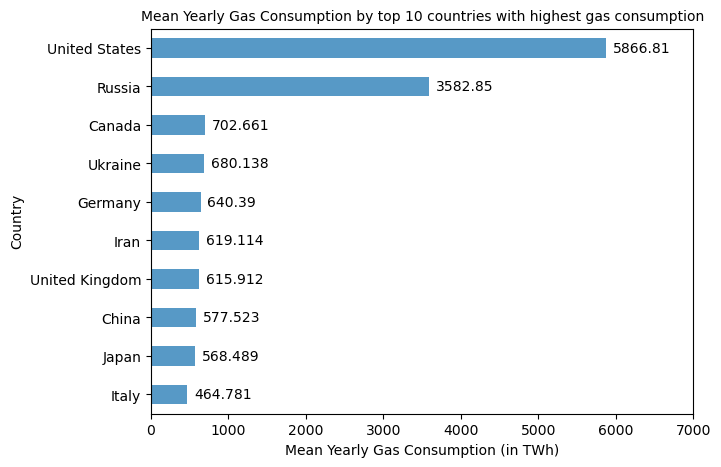

In [9]:
plt.style.use('default')
plt.figure(figsize = (7, 5))

ax = tgcc.plot.barh(rot = 0, alpha = 0.75)
ax.bar_label(ax.containers[0], padding = 5)

plt.title('Mean Yearly Gas Consumption by top 10 countries with highest gas consumption', fontsize = 10)
plt.ylabel('Country', fontsize = 10)
plt.xlabel('Mean Yearly Gas Consumption (in TWh)', fontsize = 10)
plt.xticks(np.arange(0, 7001, 1000))

plt.show()

## Historical Trend of Gas Consumption among the top 10 Individual Countries for Mean Gas Consumption (From 1985 to 2020)

In [10]:
top10gcc.index

Index(['United States', 'Russia', 'Canada', 'Ukraine', 'Germany', 'Iran',
       'United Kingdom', 'China', 'Japan', 'Italy'],
      dtype='object', name='Entity')

In [11]:
df_top10gcc = df_country[df_country['Entity'].isin(top10gcc.index)]
df_top10gcc

,Entity,Code,Year,Gas Consumption - TWh
682,Canada,CAN,1965,216.684225
683,Canada,CAN,1966,237.224887
684,Canada,CAN,1967,251.917200
685,Canada,CAN,1968,280.520775
686,Canada,CAN,1969,313.496325
...,...,...,...,...
4738,United States,USA,2016,7490.989397
4739,United States,USA,2017,7399.922517
4740,United States,USA,2018,8217.150053
4741,United States,USA,2019,8492.376669


In [12]:
df_top10gcc.loc[df_top10gcc['Year'] == 2020]

,Entity,Code,Year,Gas Consumption - TWh
737,Canada,CAN,2020,1126.351088
905,China,CHN,2020,3305.799764
1644,Germany,DEU,2020,865.455232
2036,Iran,IRN,2020,2331.021246
2260,Italy,ITA,2020,676.616628
2316,Japan,JPN,2020,1044.187416
3687,Russia,RUS,2020,4113.891944
4574,Ukraine,UKR,2020,293.387414
4686,United Kingdom,GBR,2020,724.954696
4742,United States,USA,2020,8320.194456


In [13]:
df_top10gcc.loc[df_top10gcc['Year'] == 2020].sort_values('Gas Consumption - TWh', ascending = False).reset_index()

,index,Entity,Code,Year,Gas Consumption - TWh
0,4742,United States,USA,2020,8320.194456
1,3687,Russia,RUS,2020,4113.891944
2,905,China,CHN,2020,3305.799764
3,2036,Iran,IRN,2020,2331.021246
4,737,Canada,CAN,2020,1126.351088
5,2316,Japan,JPN,2020,1044.187416
6,1644,Germany,DEU,2020,865.455232
7,4686,United Kingdom,GBR,2020,724.954696
8,2260,Italy,ITA,2020,676.616628
9,4574,Ukraine,UKR,2020,293.387414


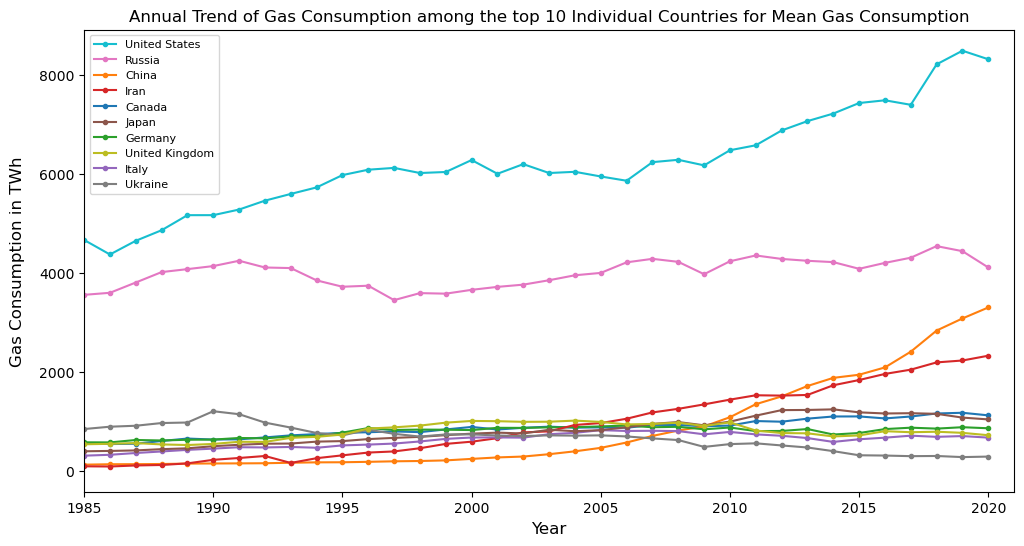

In [14]:
fig, ax = plt.subplots(figsize = (12, 6))

for gcc, group in df_top10gcc.groupby('Entity'):
    group.plot(x = 'Year', y = 'Gas Consumption - TWh', ax = ax, label = gcc, marker = '.')

plt.xlim(1985, 2021, 5)

plt.xlabel('Year', fontsize = 12)
plt.ylabel('Gas Consumption in TWh', labelpad = 10, fontsize = 12)
plt.title('Annual Trend of Gas Consumption among the top 10 Individual Countries for Mean Gas Consumption')

handles, labels = plt.gca().get_legend_handles_labels()
order = [9, 6, 1, 3, 0, 5, 2, 8, 4, 7]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc = 'upper left', fontsize = 8)

plt.show()

## Regions of the World by their Mean Gas Consumption

In [15]:
df_region

,Entity,Code,Year,Gas Consumption - TWh
0,Africa,NaN,1965,9.543754
1,Africa,NaN,1966,10.669916
2,Africa,NaN,1967,10.545670
3,Africa,NaN,1968,10.688970
4,Africa,NaN,1969,12.492000
...,...,...,...,...
4998,World,OWID_WRL,2016,35586.370667
4999,World,OWID_WRL,2017,36536.593944
5000,World,OWID_WRL,2018,38378.961722
5001,World,OWID_WRL,2019,39039.402361


In [16]:
allgcr = df_region.groupby(['Entity'])['Gas Consumption - TWh'].mean().sort_values()
allgcr

Entity
Central America                0.181524
Middle Africa                 13.427401
Western Africa                69.546382
Africa                       537.672809
South & Central America      819.372986
Middle East                 1759.820031
Asia Pacific                2785.922102
European Union              2804.466478
Europe                      4086.453499
CIS                         4220.352717
North America               6946.081836
Non-OECD                    9804.541792
OECD                       11351.134188
World                      21155.675980
Name: Gas Consumption - TWh, dtype: float64

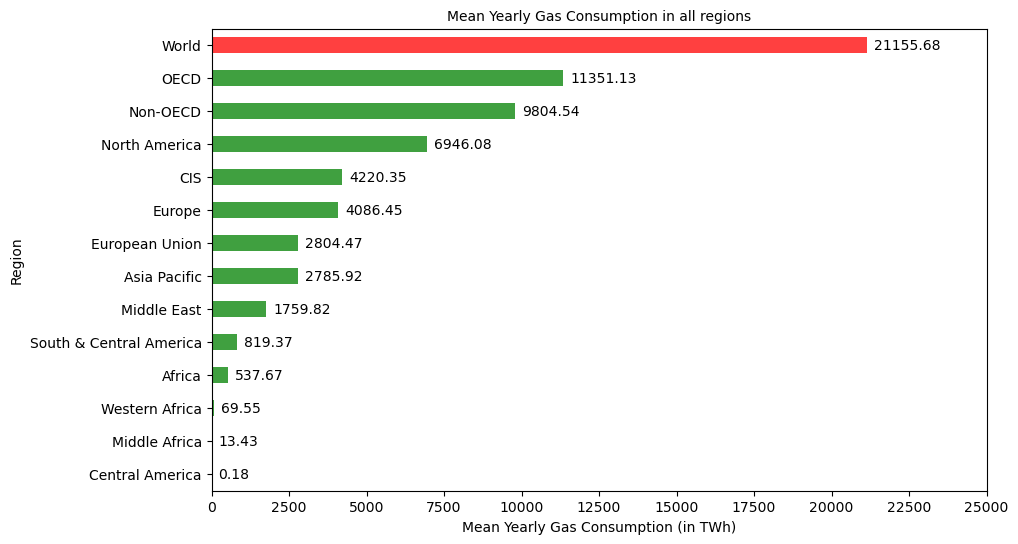

In [17]:
plt.style.use('default')
plt.figure(figsize = (10, 6))

ax = allgcr.plot.barh(rot = 0, alpha = 0.75, color = ['Red' if a == 'World' else 'Green' for a in allgcr.index])

ax.bar_label(ax.containers[0], fmt = '%.2f', padding = 5)

plt.title('Mean Yearly Gas Consumption in all regions', fontsize = 10)
plt.ylabel('Region', fontsize = 10)
plt.xlabel('Mean Yearly Gas Consumption (in TWh)', fontsize = 10)
plt.xticks(np.arange(0, 25001, 2500))
plt.xlim(0, 25000)

plt.show()

## Historical Trend of Gas Consumption among all regions of the World

In [18]:
df_region.groupby('Entity')['Gas Consumption - TWh'].mean()

Entity
Africa                       537.672809
Asia Pacific                2785.922102
CIS                         4220.352717
Central America                0.181524
Europe                      4086.453499
European Union              2804.466478
Middle Africa                 13.427401
Middle East                 1759.820031
Non-OECD                    9804.541792
North America               6946.081836
OECD                       11351.134188
South & Central America      819.372986
Western Africa                69.546382
World                      21155.675980
Name: Gas Consumption - TWh, dtype: float64

In [19]:
df_region.loc[df_region['Year'] == 2020].sort_values('Gas Consumption - TWh', ascending = False).reset_index()

,index,Entity,Code,Year,Gas Consumption - TWh
0,5002,World,OWID_WRL,2020,38227.773333
1,2984,Non-OECD,NaN,2020,20650.978181
2,3183,OECD,NaN,2020,17576.795158
3,3040,North America,NaN,2020,10309.479692
4,223,Asia Pacific,NaN,2020,8615.945644
5,2760,Middle East,NaN,2020,5523.133356
6,1420,Europe,NaN,2020,5410.972264
7,681,CIS,NaN,2020,5382.070469
8,1476,European Union,NaN,2020,3799.387092
9,55,Africa,NaN,2020,1529.681590


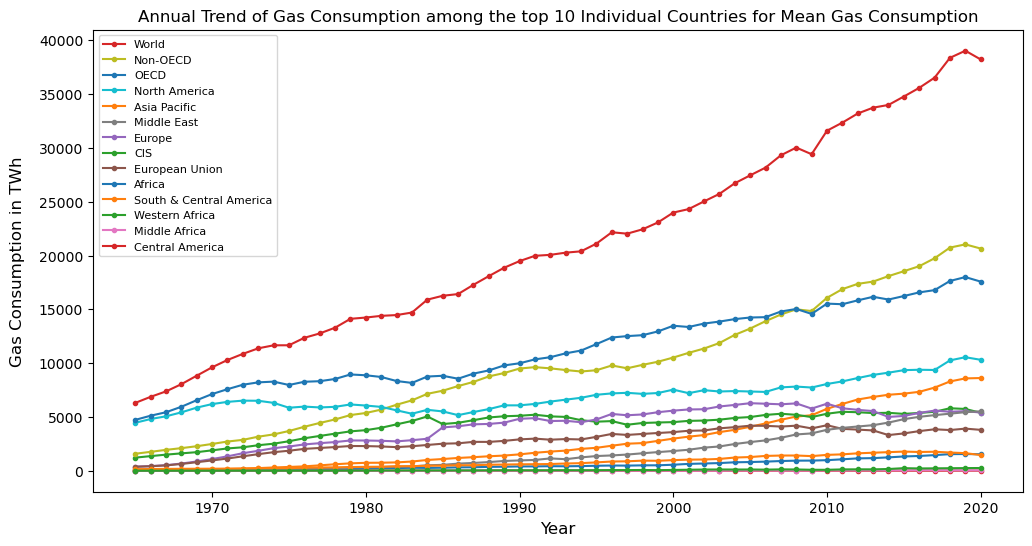

In [20]:
fig, ax = plt.subplots(figsize = (12, 6))

for gcr, group in df_region.groupby('Entity'):
    group.plot(x = 'Year', y = 'Gas Consumption - TWh', ax = ax, label = gcr, marker = '.')

plt.xlabel('Year', fontsize = 12)
plt.ylabel('Gas Consumption in TWh', labelpad = 10, fontsize = 12)
plt.title('Annual Trend of Gas Consumption among the top 10 Individual Countries for Mean Gas Consumption')

handles, labels = plt.gca().get_legend_handles_labels()
order = [13, 8, 10, 9, 1, 7, 4, 2, 5, 0, 11, 12, 6, 3]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc = 'upper left', fontsize = 8)

plt.show()